In [16]:
from IPython.display import display
from math import ceil, sqrt
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller

# colors generator
from itertools import cycle
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from tslearn.barycenters import dtw_barycenter_averaging
# Modeling
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from statsmodels.tsa.arima_model import ARIMA
# import pmdarima as pm
from sklearn.model_selection import ParameterGrid
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# assert reproducibility
import random
random.seed(7)
np.random.seed(7)
print("setup complete")

setup complete


In [17]:
sales = pd.read_csv('70prod_data.csv',\
                    index_col=0, parse_dates=True)

In [18]:
sales.head()

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,...,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70
2014-07-31,2669,3603,3506,1274,1528,2244,1460,2523,2045,1713,...,1721,2506,3011,1039,1374,1840,1359,1407,1108,1544
2014-08-31,2794,3405,3279,1449,1526,1970,1423,2660,2065,1774,...,1906,2701,3081,1134,1331,1877,1424,1503,1061,1490
2014-09-30,2289,3434,3238,1426,1484,1877,1369,2581,1775,1875,...,1979,2618,3004,1160,1327,1827,1357,1449,1049,1465
2014-10-31,2310,3277,3088,1404,1500,1615,1159,2326,1614,1893,...,1982,2693,3215,1180,1369,1883,1384,1446,1050,1584
2014-11-30,2559,3396,2921,1329,1384,1796,1395,2351,1749,1678,...,2025,2607,3280,1065,1286,1766,1345,1377,988,1518


In [19]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
P_1,63.0,3510.761905,656.364885,2289.0,2997.0,3546.0,3992.0,4885.0
P_2,63.0,4341.333333,671.591874,3152.0,3848.0,4464.0,4810.0,5873.0
P_3,63.0,4448.523810,693.352814,2909.0,4105.5,4607.0,4943.0,5644.0
P_4,63.0,2267.888889,435.481014,1274.0,2065.0,2371.0,2541.5,2974.0
P_5,63.0,2390.111111,489.206009,1252.0,2198.5,2492.0,2705.5,3327.0
...,...,...,...,...,...,...,...,...
P_66,63.0,2075.317460,231.814082,1742.0,1877.5,2035.0,2231.0,2591.0
P_67,63.0,1685.857143,275.337556,1294.0,1424.0,1645.0,1928.5,2199.0
P_68,63.0,1649.063492,303.335058,748.0,1427.5,1562.0,1915.5,2243.0
P_69,63.0,1420.682540,313.456218,766.0,1164.0,1538.0,1658.5,1968.0


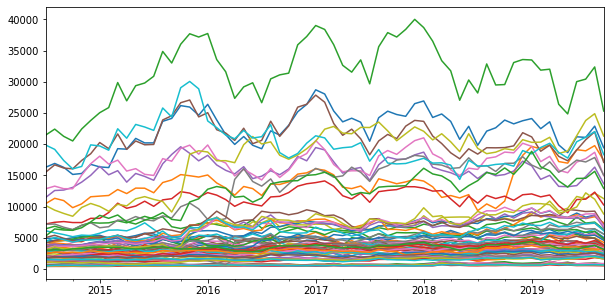

In [20]:
sales.plot(figsize=(10, 5),legend=False)
plt.show()

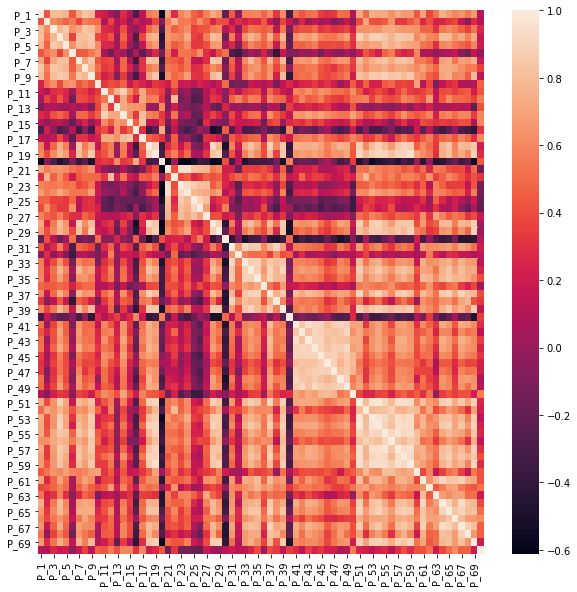

In [21]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr())

In [22]:
sales.columns

Index(['P_1', 'P_2', 'P_3', 'P_4', 'P_5', 'P_6', 'P_7', 'P_8', 'P_9', 'P_10',
       'P_11', 'P_12', 'P_13', 'P_14', 'P_15', 'P_16', 'P_17', 'P_18', 'P_19',
       'P_20', 'P_21', 'P_22', 'P_23', 'P_24', 'P_25', 'P_26', 'P_27', 'P_28',
       'P_29', 'P_30', 'P_31', 'P_32', 'P_33', 'P_34', 'P_35', 'P_36', 'P_37',
       'P_38', 'P_39', 'P_40', 'P_41', 'P_42', 'P_43', 'P_44', 'P_45', 'P_46',
       'P_47', 'P_48', 'P_49', 'P_50', 'P_51', 'P_52', 'P_53', 'P_54', 'P_55',
       'P_56', 'P_57', 'P_58', 'P_59', 'P_60', 'P_61', 'P_62', 'P_63', 'P_64',
       'P_65', 'P_66', 'P_67', 'P_68', 'P_69', 'P_70'],
      dtype='object')

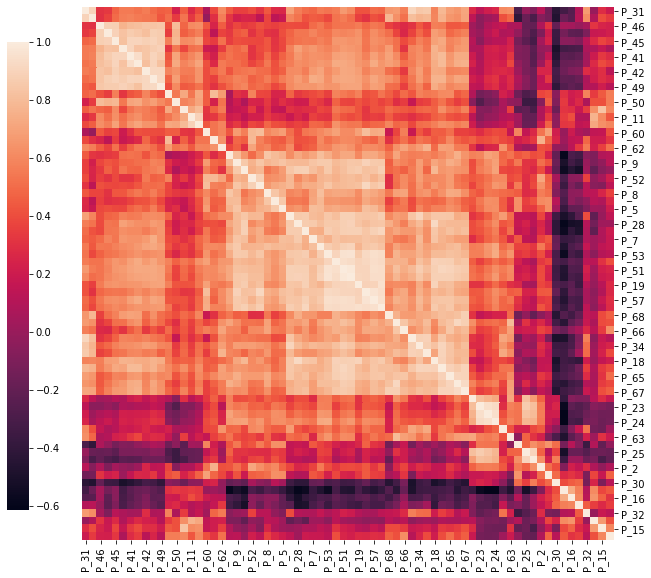

In [23]:
cg = sns.clustermap(sales.corr(), figsize=(10, 10), cbar_pos=(.1, .1, .03, .65))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

On observe une forte correlation entre certains groupes de produits, ce qui suggère qu'on peut les classifier selon leurs comportements de ventes.


## clustering
L'un des problèmes qu'on doit traiter avant de commencer le partitionnement (clustering) est l'échelle de la série. Sans normaliser les données, les séries qui se ressemblent seront vues si différentes les unes des autres et affecteront la précision du processus de clustering. Nous pouvons voir l'effet de la normalisation dans les images suivantes.

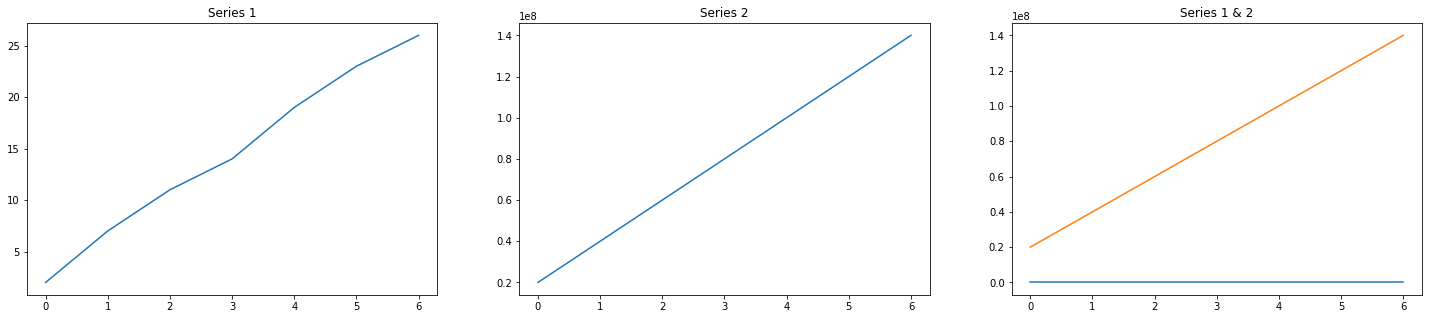

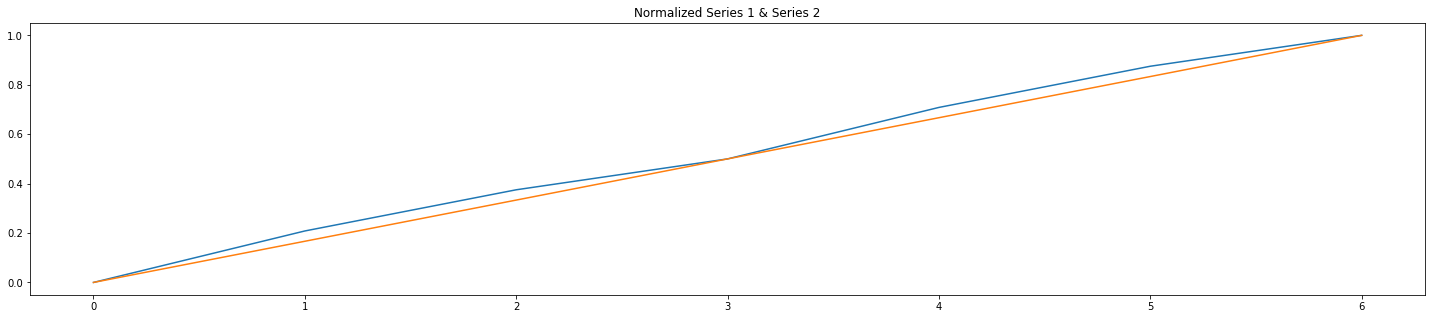

In [24]:
a = [[2],[7],[11],[14],[19],[23],[26]]
b = [[20000000],[40000000],[60000000],[80000000],[100000000],[120000000],[140000000]]
fig, axs = plt.subplots(1,3,figsize=(25,5))
axs[0].plot(a)
axs[0].set_title("Series 1")
axs[1].plot(b)
axs[1].set_title("Series 2")
axs[2].plot(a)
axs[2].plot(b)
axs[2].set_title("Series 1 & 2")
plt.figure(figsize=(25,5))
plt.plot(MinMaxScaler().fit_transform(a))
plt.plot(MinMaxScaler().fit_transform(b))
plt.title("Normalized Series 1 & Series 2")
plt.show()

In [25]:
mySeries = [sales[[col]] for col in sales.columns]
scaler = MinMaxScaler()
for i in range(len(mySeries)):
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

Afin de regrouper nos séries avec des k-moyennes, les indices temporels des séries chronologiques seront considérés comme des caractéristiques différentes et seront les dimensions des points de données(les séries). 

Puisque la longueur des série temporelles en pratique est souvent importante, un autre problème auquel on doit faire face est la malédiction de la dimensionnalité,ce terme a été inventé pour la première fois par Richard E. Bellman lors de l'examen des problèmes de programmation dynamique. Cela signifie essentiellement que lorsque la dimensionnalité des données augmente, la distance entre les points de données augmente également. Ainsi, ce changement de mesure de la distance affecte gravement les algorithmes basés sur la distance.

Pour résoudre ce problème, on va effectuer une analyse en composantes principales ACP avant le partitionnement.

In [26]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(mySeries)

Désormais avec moins de dimensions qu'avant, nous pouvons voir comment nos séries se répartissent en 2 dimensions.

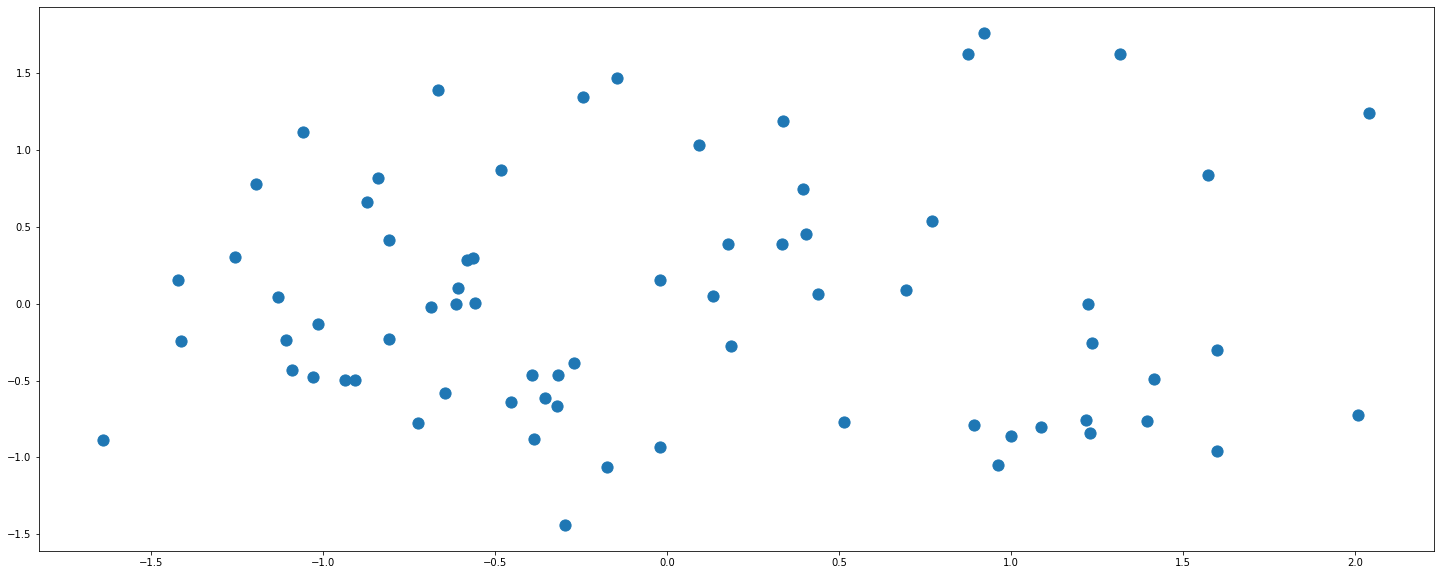

In [27]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:,0],pca_res[:,1], s=125)
plt.show()

Kmeans:
Le partitionnement en k-moyennes (ou k-means en anglais) est une méthode de partitionnement de données et un problème d'optimisation combinatoire. Étant donnés des points et un entier k, le problème est de diviser les points en k groupes, souvent appelés clusters, de façon à minimiser une certaine fonction. On considère la distance d'un point à la moyenne des points de son cluster (centroid) ; la fonction à minimiser est la somme des carrés de ces distances,la distance euclidienne est souvent utilisée.

Initialement on va éstimer le nombre de clusters requis par la racine du nombre des points (séries), on obtient 9 clusters.

In [28]:
cluster_count = ceil(sqrt(len(mySeries))) 
cluster_count

9

et on va appliquer la méthode de Kmeans sur le résultat de l'ACP.

In [29]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=50000)
labels = kmeans.fit_predict(pca_res)

Après l'entrainement du modèle, on a présenté les résultats. Pour chaque cluster, on a tracé les séries en gris, et afin de visualiser le mouvement et le comportement des séries appartenant au même cluster, on a pris la moyenne du cluster et tracé cette série moyenne en rouge.

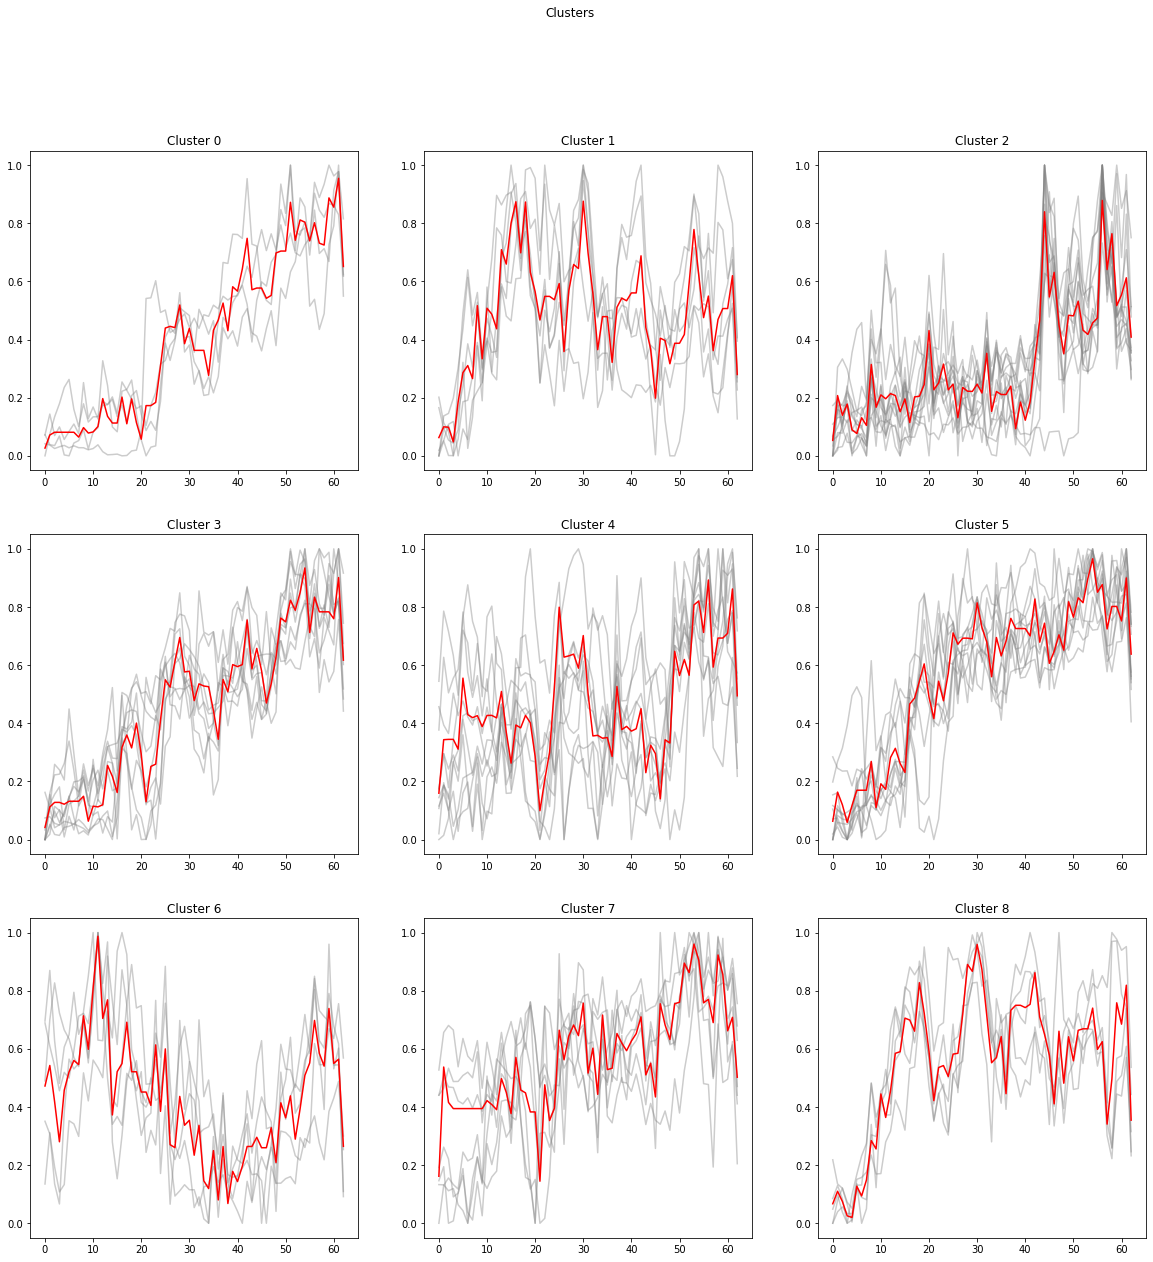

In [30]:
som_y = ceil(sqrt(sqrt(len(mySeries))))
plot_count = ceil(sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(20,20))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        #axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red") 
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

Nous pouvons voir la distribution des séries chronologiques en clusters dans le graphique suivant.

les séries semblent uniformement distribuées aux clusters.

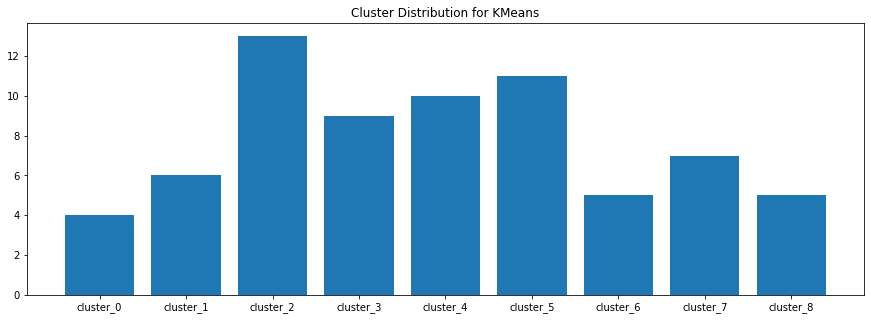

In [31]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

Pour bénéficier de partitionnement qu'on a fait, il est nécessaire de lister pour chaque cluster, les séries qui lui appartiennent.

In [32]:
namesofMySeries=sales.columns
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
groups = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).\
    sort_values(by="Cluster").set_index("Cluster")
for cluster in sorted(set(fancy_names_for_labels)):
    print(cluster+':', \
          ', '.join(sorted(groups[groups.index == cluster]['Series'], \
                            key=lambda x: int(x.split('_')[1]))))

Cluster 0: P_18, P_37, P_65, P_67
Cluster 1: P_2, P_6, P_10, P_25, P_26, P_27
Cluster 2: P_11, P_12, P_14, P_41, P_42, P_43, P_44, P_45, P_46, P_47, P_48, P_49, P_50
Cluster 3: P_19, P_34, P_35, P_39, P_51, P_58, P_59, P_61, P_64
Cluster 4: P_15, P_17, P_22, P_32, P_36, P_60, P_62, P_63, P_66, P_70
Cluster 5: P_4, P_7, P_9, P_28, P_29, P_33, P_53, P_54, P_55, P_57, P_69
Cluster 6: P_13, P_16, P_20, P_30, P_40
Cluster 7: P_1, P_5, P_8, P_31, P_38, P_52, P_68
Cluster 8: P_3, P_21, P_23, P_24, P_56


On a selectionné le produit le plus proche du centroide de chaque cluster, autrement dit le plus proche aux autres produits au même groupe.

In [33]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, pca_res)
closest

array([36,  5, 46, 63, 21, 54, 29, 37, 23], dtype=int64)

Pour visualiser ce résultat, on a tracé l'ensemble des points ainsi que les centres des groupes (étoiles), le point le plus proche de chaque centre est présenté en gris.

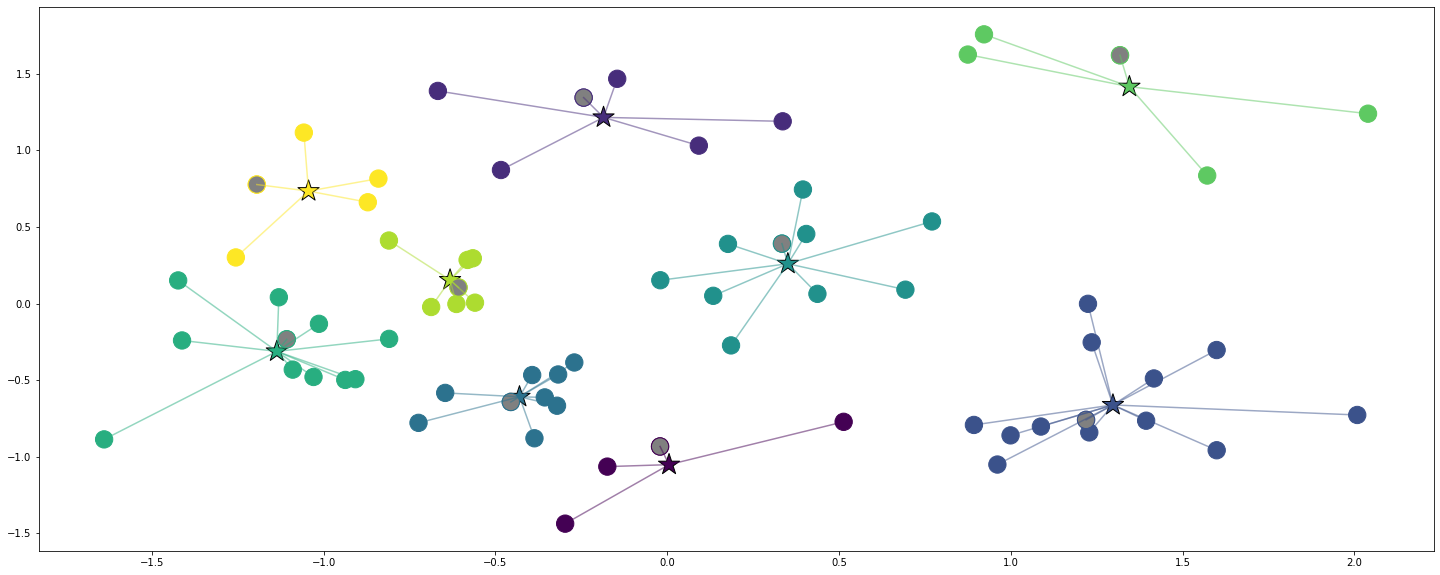

In [34]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=labels, s=300)
sc = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], \
            marker='*', c=np.unique(labels), edgecolors='black', s=500)
plt.scatter(pca_res[closest, 0], pca_res[closest, 1], c='grey', \
            edgecolors=[sc.to_rgba(lab) for lab in np.unique(labels)], s=300)
for cluster_lab, cluster_x, cluster_y in \
zip(np.unique(labels), kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]):
    for pt_lab, pt_x, pt_y in zip(labels, pca_res[:, 0], pca_res[:, 1]):
        if cluster_lab==pt_lab:
            x, y = [cluster_x, pt_x], [cluster_y, pt_y]
            plt.plot(x, y, c=sc.to_rgba(cluster_lab), alpha=0.5)
plt.show()

pour re vérifier ces résultats, on peut voir que les séries choisis sont centrées pour chaque groupe. 

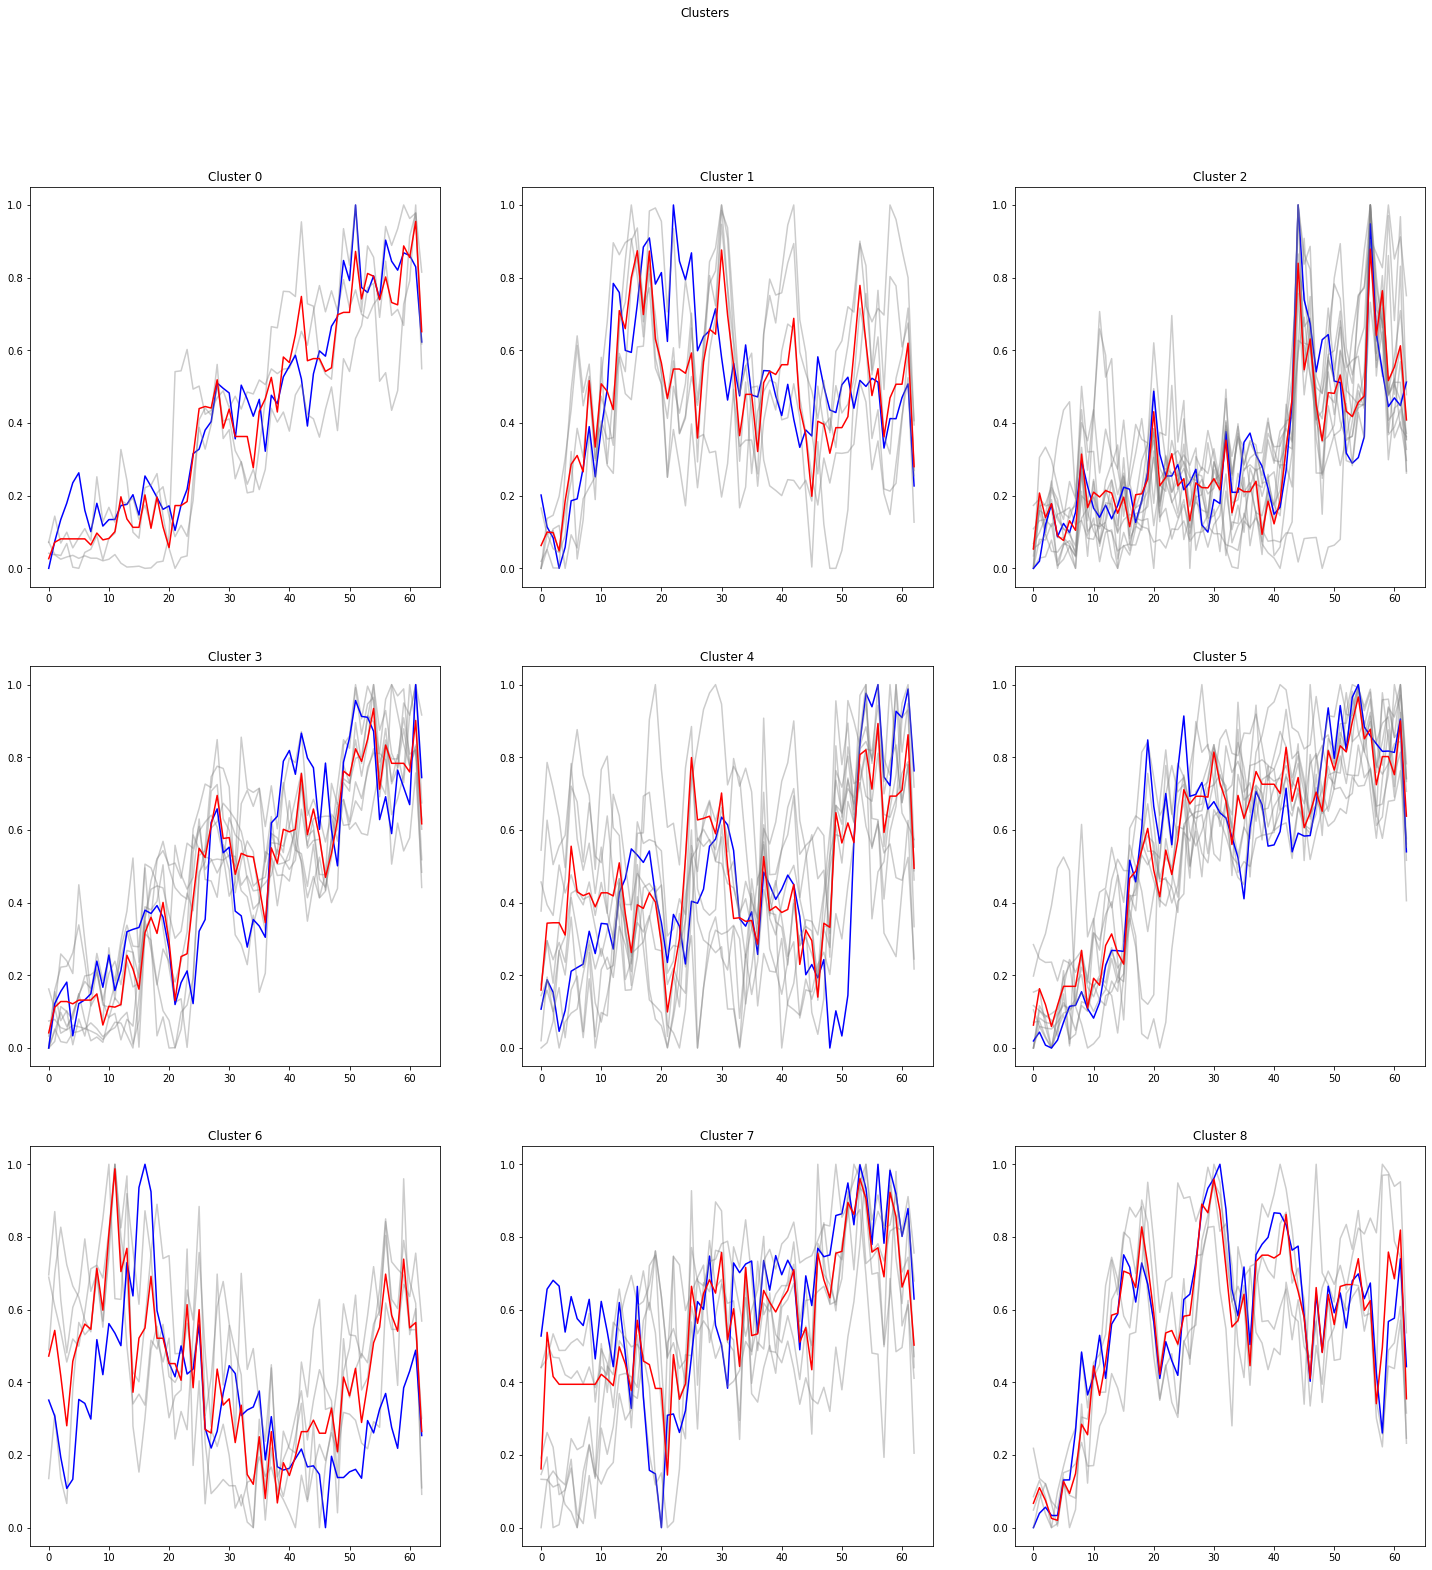

In [35]:
fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                if i not in closest :
                    axs[row_i, column_j].plot(mySeries[i], c="gray",alpha=0.4)
                else : 
                    axs[row_i, column_j].plot(mySeries[i],c="blue")
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        #axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red") 
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.show()

On a extrait les produits représentatifs des groupes et on a construit un nouveau jeu de données de séries temporelles sur lequel on va travailler par la suite.

In [36]:
sales_s = sales.iloc[:, sorted(closest)]
sales_s.head()

,P_6,P_22,P_24,P_30,P_37,P_38,P_47,P_55,P_64
2014-07-31,2244,10467,7204,19852,1865,3510,510,3849,1039
2014-08-31,1970,11319,7477,19164,2043,3804,524,3980,1134
2014-09-30,1877,10956,7592,17382,2188,3859,595,3787,1160
2014-10-31,1615,9822,7435,16034,2297,3823,636,3745,1180
2014-11-30,1796,10427,7434,16430,2432,3535,572,3861,1065


,count,mean,std,min,25%,50%,75%,max
P_6,63.0,3182.793651,668.663283,1615.0,2863.0,3176.0,3508.5,4733.0
P_22,63.0,13833.523810,2646.570080,9339.0,11800.0,13541.0,15096.5,19889.0
P_24,63.0,11114.365079,1667.354049,7204.0,10201.0,11284.0,12235.0,14105.0
P_30,63.0,19873.571429,3179.000090,14339.0,17350.5,19426.0,21268.5,30048.0
P_37,63.0,2912.920635,635.676000,1865.0,2296.5,2873.0,3335.5,4273.0
P_38,63.0,3731.333333,485.265142,2310.0,3481.0,3797.0,4012.5,4586.0
P_47,63.0,735.206349,147.854130,510.0,633.5,698.0,828.0,1222.0
P_55,63.0,6718.682540,1551.085778,3745.0,5570.0,6991.0,7946.5,9120.0
P_64,63.0,1409.571429,213.484888,1039.0,1231.5,1334.0,1607.5,1817.0


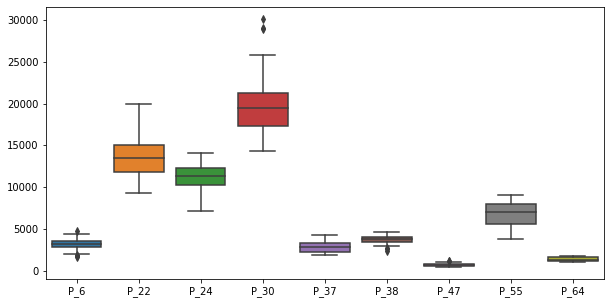

In [37]:
display(sales_s.describe().T)
plt.figure(figsize=(10,5))
sns.boxplot(data=sales_s)
plt.show()

Ce qu'on peut confimer graphiquement :

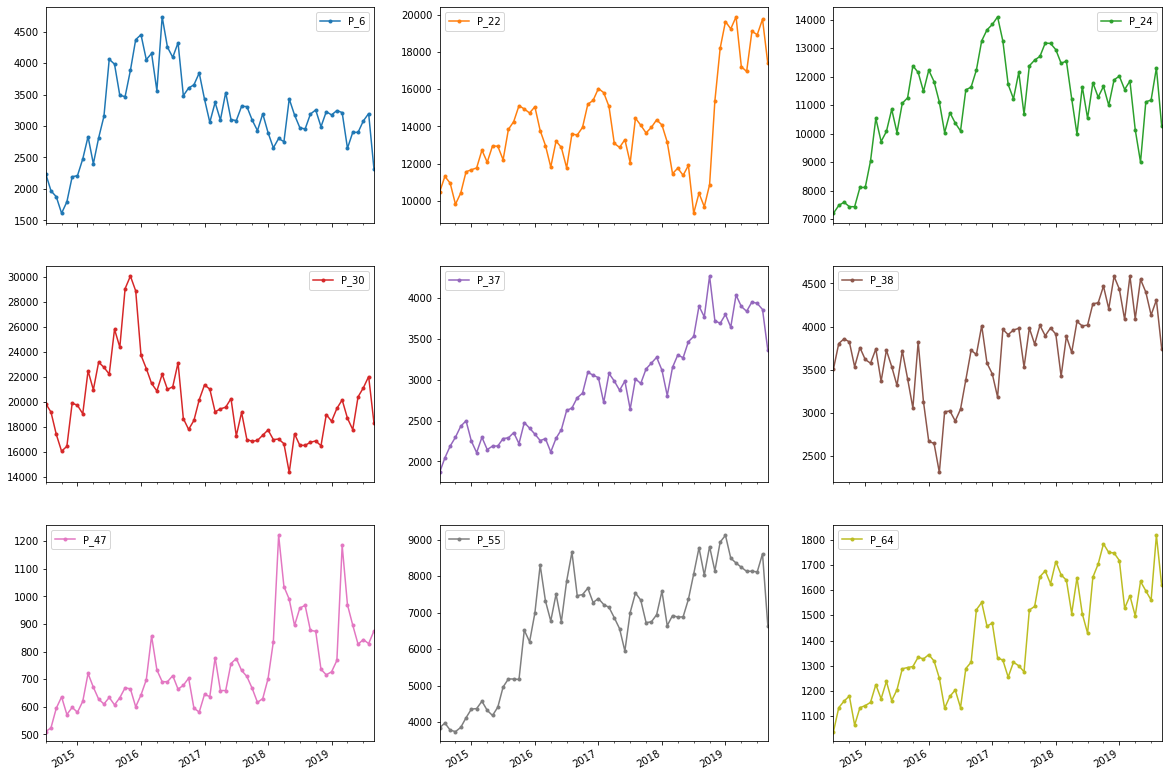

In [38]:
sales_s.plot(subplots=True,layout=(3,3),figsize=(20,15), marker='.')
plt.show()

## Moyenne mobile des séries

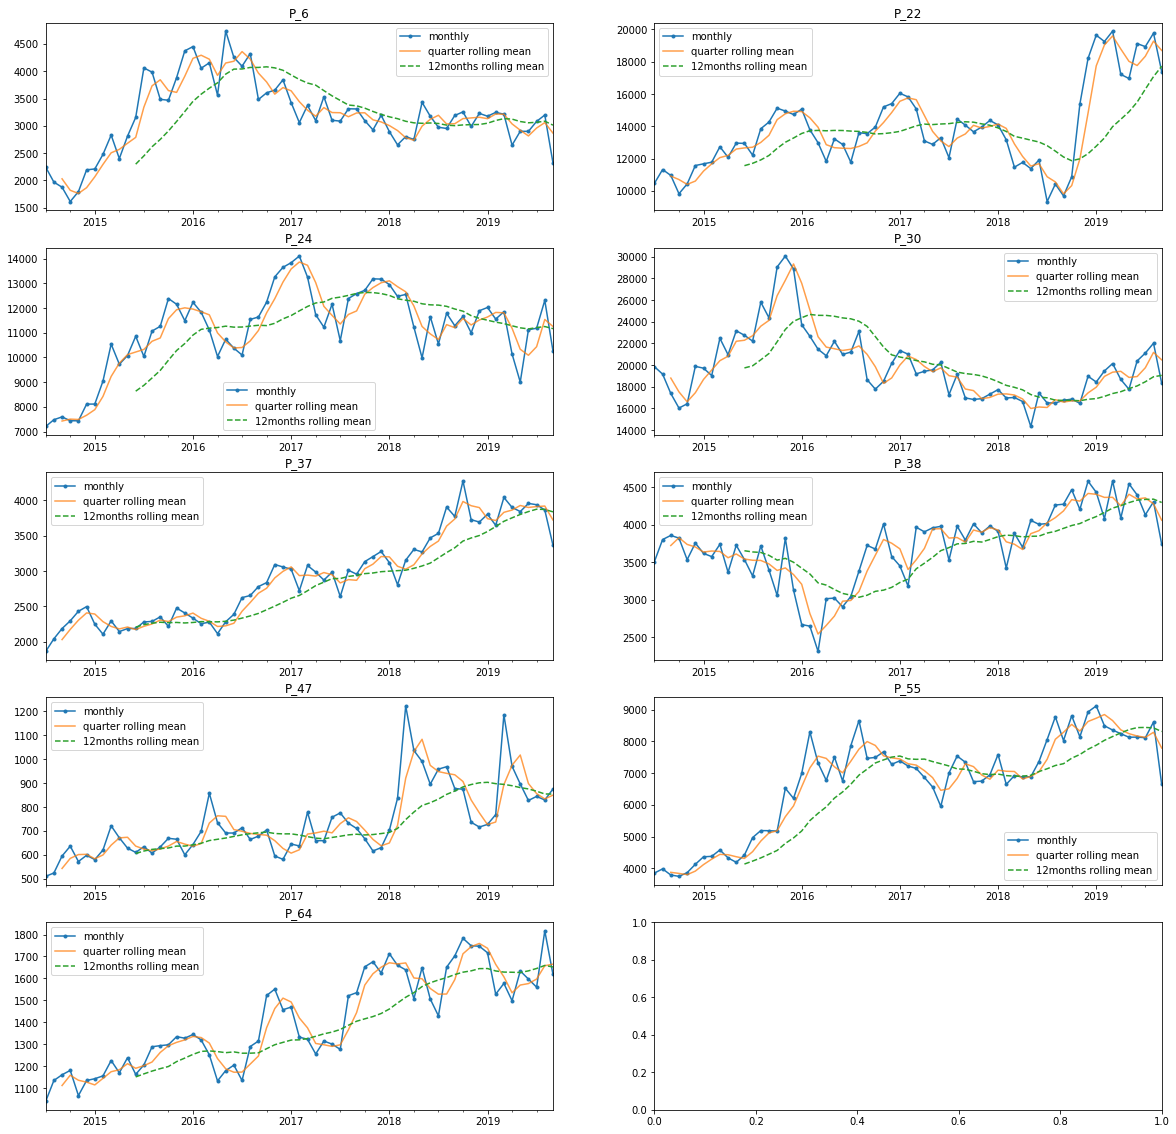

In [39]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
cols = [next(color_cycle), next(color_cycle), next(color_cycle)]
for i, item in enumerate(sales_s.columns):
    sales_s[item].plot(title=item,
                     color=cols[0],
                     ax=axs[i],
                     marker='.', label="monthly")
    sales_s[item].rolling(3).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="quarter rolling mean", alpha=0.75)
    sales_s[item].rolling(12).mean().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="12months rolling mean")
    axs[i].legend()

## visualisation de la saisonnalité

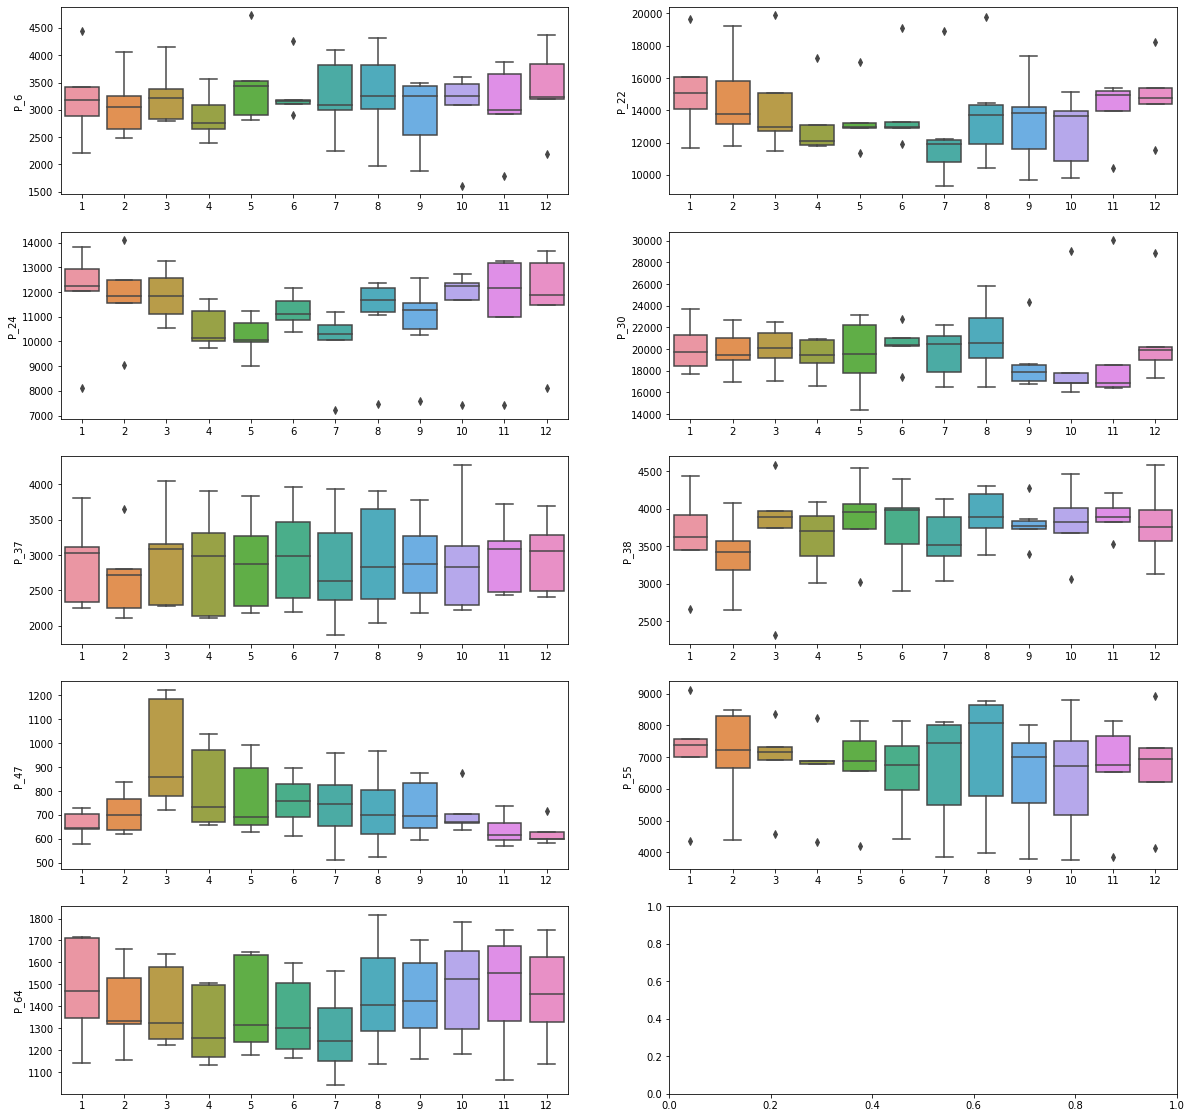

In [40]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales_s.columns, axes):
    sns.boxplot(data=sales_s, x=sales_s.index.month, y=name, ax=ax)

## Décomposition des séries

In [41]:
def plotseasonal(res, axes, name):
    res.observed.plot(ax=axes[0], legend=False, title=name)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, marker='o', linestyle='', markersize=5)
    axes[3].set_ylabel('Residual')
    plotseasonal.counter += 1
def grid_plotseasonal(df, ncol):
    nrow=ceil(len(df.columns)/ncol)*4
    fig, axes = plt.subplots(ncols=ncol, nrows=nrow, sharex=True, figsize=(15,1.5*nrow))
    plotseasonal.counter, k = 0, 0
    for i,col in enumerate(df.columns):
        res = seasonal_decompose(df[col].dropna(), period=12, filt=None)
        plotseasonal(res, axes[k:k+4, i%ncol], col)
        if (i%ncol)==(ncol-1) : k+=4
    plt.tight_layout()
    plt.show()

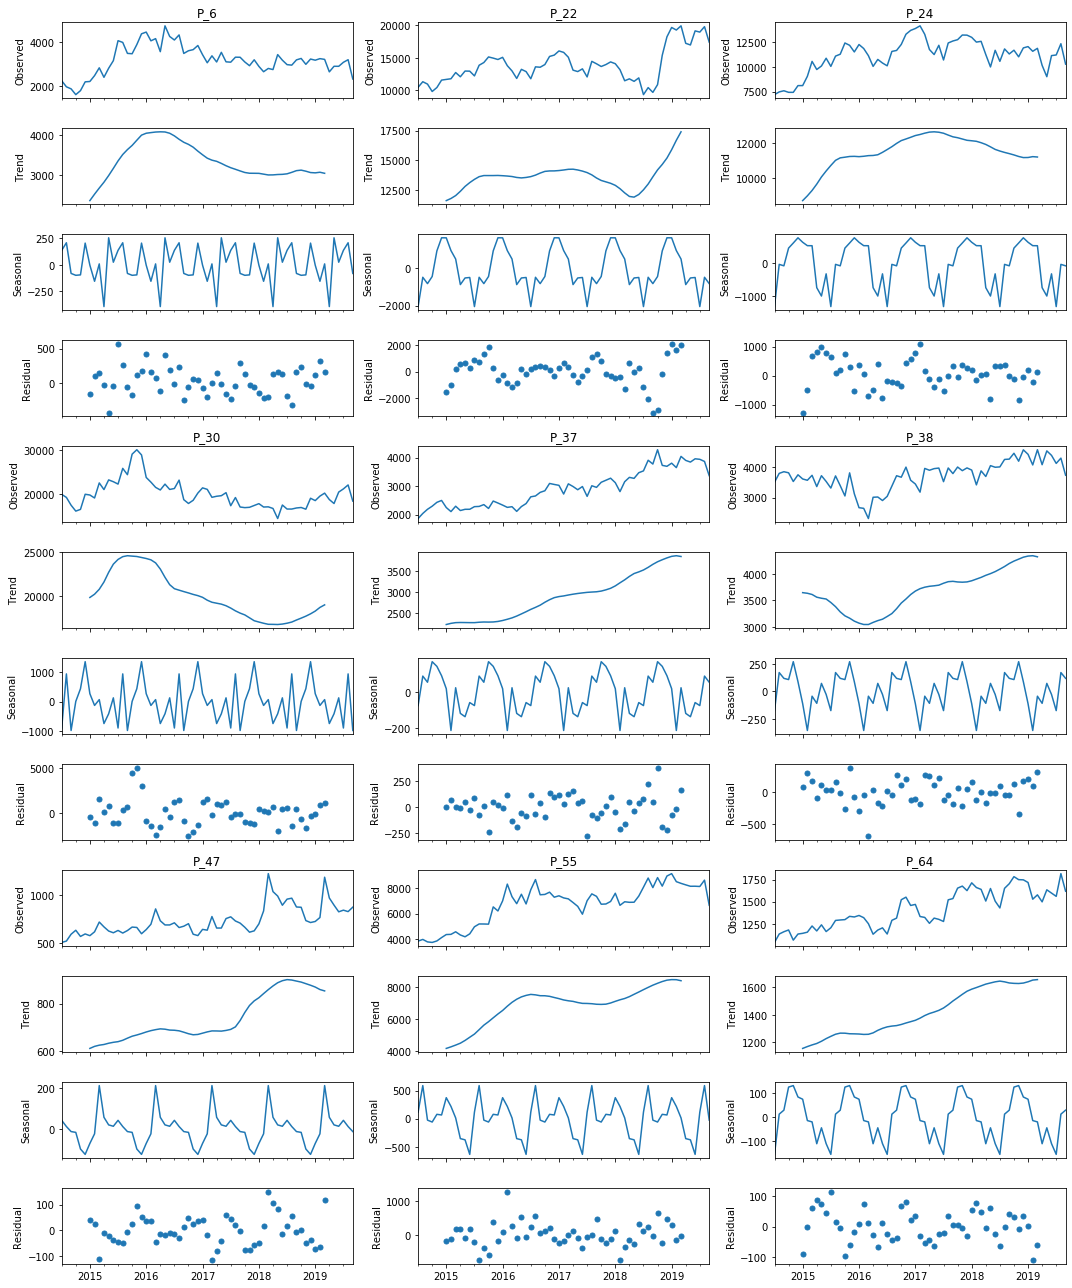

In [42]:
grid_plotseasonal(sales_s, ncol=3)

La fonction season_decompose peut être utilisée pour l'analyse des portions de chaque composant de la série chronologique. Ceci est particulièrement utile pour déterminer l'absorption des résidus dans les données, sur la base des données décomposées. Le volume de cette absorption implique la prévisibilité de la série chronologique - plus les résidus sont élevés, moins la prévisibilité. Dans une certaine mesure, la proportion des résidus par rapport à la tendance et à la saisonnalité peut également être illustrée par les graphiques des moyennes mobiles et des écarts-types ci-dessus.

In [43]:
d = pd.DataFrame(0, index=sales_s.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales_s.columns:
    result = seasonal_decompose(sales_s[col], period=12, model='additive')
    res, obs = result.resid, result.observed
    d.loc[col][:2] = list(map(lambda x: np.mean(np.abs(x)), (res, obs[~np.isnan(res)])))
d.PERC = d.RESMEAN*100/d.OBSMEAN
d.round(2)

,RESMEAN,OBSMEAN,PERC
P_6,161.56,3368.08,4.80
P_22,814.70,13678.31,5.96
P_24,398.92,11587.02,3.44
P_30,1130.08,20098.61,5.62
P_37,94.88,2888.78,3.28
P_38,150.17,3677.69,4.08
P_47,46.05,738.08,6.24
P_55,261.75,6902.75,3.79
P_64,41.16,1418.96,2.90


Un diagramme de décalage (lag plot) est un nuage de points pour une série chronologique et les mêmes données décalées. Avec un tel graphe, nous pouvons vérifier s'il existe une corrélation possible entre les ventes ce mois et le mois précédent.

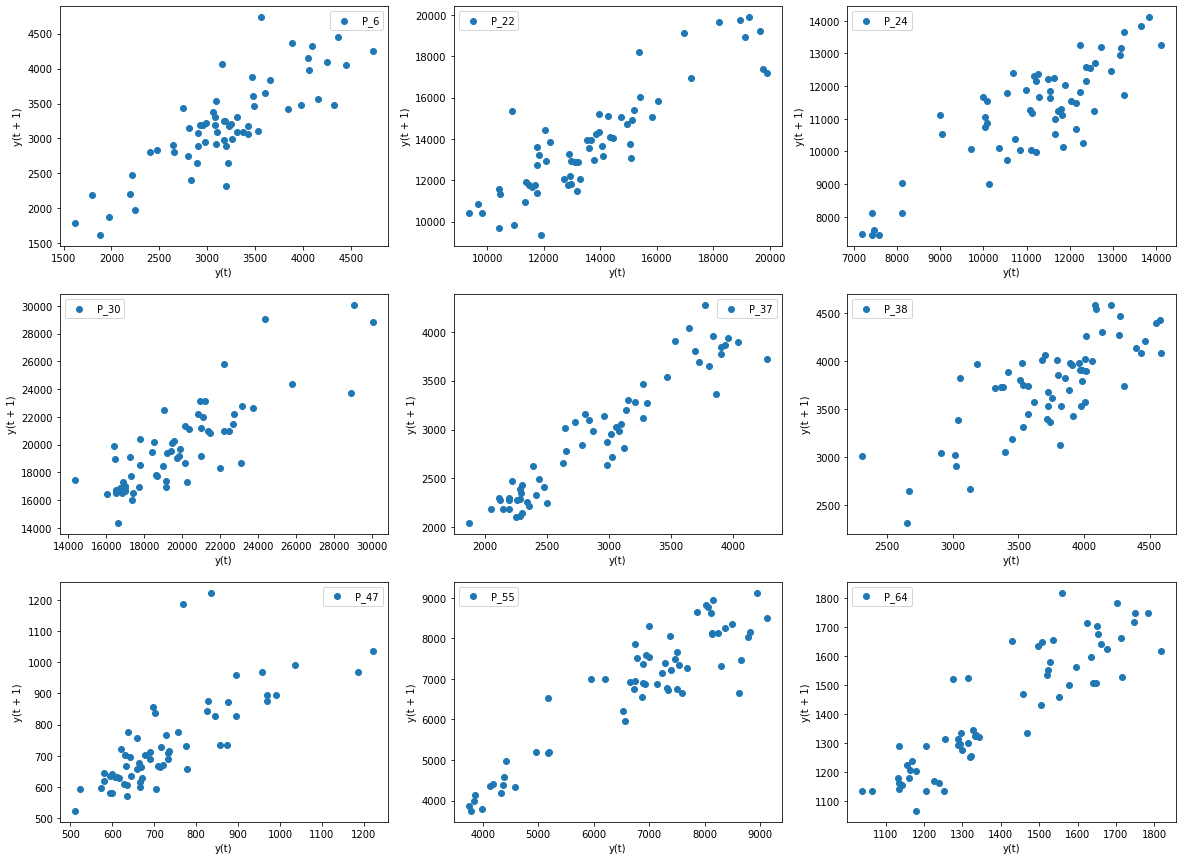

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for name, ax in zip(sales_s.columns, axes):
    lag_plot(sales_s[name], ax=ax, label=name)
    ax.legend()

Le test Augmented Dickey-Fuller (ADF) est un type de test statistique appelé test de racine unitaire. Les racines unitaires sont une cause de non-stationnarité.

* Hypothèse nulle (H0): la série chronologique a une racine unitaire. (La série chronologique n'est pas stationnaire).

* Hypothèse alternative (H1): La série chronologique n'a pas de racine unitaire (la série chronologique est stationnaire).

Si l'hypothèse nulle peut être rejetée, nous pouvons conclure que la série chronologique est stationnaire.

Il existe deux façons de rejeter l'hypothèse nulle:

D'une part, l'hypothèse nulle peut être rejetée si la valeur p est inférieure à un niveau de signification défini. Le niveau de signification par défaut est de 5%

* <span style='color:Red'> **p_value > niveau de risque (par défaut: 0,05)** </span>: échec de rejet de l'hypothèse nulle (H0), les données ont une racine unitaire et ne sont pas stationnaires.

* <span style='color:Green'> **p-value <= niveau de signification (par défaut: 0,05)** </span>: Rejetez l'hypothèse nulle (H0), les données n'ont pas de racine unitaire et sont stationnaires.

En revanche, l'hypothèse nulle peut être rejetée si la statistique de test est inférieure à la valeur critique.

* <span style='color:Red'> **Statistique ADF> valeur critique** </span>: échec de rejet de l'hypothèse nulle (H0), les données ont une racine unitaire et sont <span style='color:Red'> non-stationnaires </span>.
* <span style='color:Green'> **Statistique ADF <valeur critique** </span>: Rejetez l'hypothèse nulle (H0), les données n'ont pas de racine unitaire et sont <span style='color:Green'> stationnaires </span>.

In [46]:
# pd.DataFrame(zip(sales_s.columns, \
#                  *[[adfuller(sales_s[i], regression='ct', autolag='AIC')[j] for i in sales_s.columns] \
#                    for j in range(4)], \
#                  *[[[adfuller(sales_s[i], regression='ct', autolag='AIC')[4] for i in sales_s.columns][i][risk] \
#                     for i in range(9)] for risk in ('1%', '5%', '10%')]), \
#              columns=["Series", "Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%"]).set_index("Series")

In [47]:
# salma code
# res = pd.DataFrame(columns=['Test statistic', 'p-value', 'lag used','Number of Observations Used','1%','5%','10%'])

# for col in  sales_s.columns:
#     dftest = adfuller(sales_s[col], regression='ct', autolag='AIC')
#     res = res.append({'Test statistic':dftest[0], 'p-value':dftest[1],'lag used':int(dftest[2]),\
#                       'Number of Observations Used':int(dftest[3]),'1%':dftest[4]['1%'],'5%':dftest[4]['5%'],\
#                       '10%':dftest[4]['10%']},ignore_index=True)
# res.round(3)
# res.iloc[:, 2] = res.iloc[:, 2].astype(int)
# res.iloc[:, 3] = res.iloc[:, 3].astype(int)
# res.set_index(sales_s.columns)

In [49]:
# from arch.unitroot import ADF

# adf = ADF(sales_s["P_6"])
# print(adf.summary().as_text())

In [50]:
res = pd.DataFrame(sales_s.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5] = [[adfuller(sales_s[i], regression='c', autolag='AIC')[j]\
                                           for i in sales_s.columns] for j in range(5)]
res[5], res[6], res[7] = [[res[5][i][risk] for i in range(len(sales_s.columns))] for risk in ('1%', '5%', '10%')]
res=res.set_index("Series")
res[8] = (res.iloc[:,0] < res.iloc[:,4]).astype(int)+ (res.iloc[:,0] < res.iloc[:,5])+ (res.iloc[:,0] < res.iloc[:,6])
res[8] = ["Stationaire avec 90% de confiance" if x == 1 else "Stationaire avec 95% de confiance" \
          if x == 2 else "Stationaire avec 99% de confiance" if x == 3 else "Non stationnaire" for x in res[8]]
res.columns = ["Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%", "Conclusion"]
res

,Test statistic,P-value,Lags Used,Observations Used,1%,5%,10%,Conclusion
Series,,,,,,,,
P_6,-1.642907,0.460742,11,51,-3.565624,-2.920142,-2.598015,Non stationnaire
P_22,-3.137132,0.023925,7,55,-3.555273,-2.915731,-2.595670,Stationaire avec 95% de confiance
P_24,-2.893762,0.046078,0,62,-3.540523,-2.909427,-2.592314,Stationaire avec 90% de confiance
P_30,-2.313024,0.167802,0,62,-3.540523,-2.909427,-2.592314,Non stationnaire
P_37,-1.278226,0.639074,1,61,-3.542413,-2.910236,-2.592745,Non stationnaire
P_38,-1.728611,0.416435,1,61,-3.542413,-2.910236,-2.592745,Non stationnaire
P_47,-3.011219,0.033860,0,62,-3.540523,-2.909427,-2.592314,Stationaire avec 95% de confiance
P_55,-1.936396,0.315137,1,61,-3.542413,-2.910236,-2.592745,Non stationnaire
P_64,-0.869785,0.797760,8,54,-3.557709,-2.916770,-2.596222,Non stationnaire


In [51]:
def highlight_greater(x):
    r, g = 'red', 'green'
    m1 = x['Test statistic'] > x['1%']
    m2 = x['Test statistic'] > x['5%']
    m3 = x['Test statistic'] > x['10%']
    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['1%'] = np.where(m1, f'background-color: {r}', df1['1%'])
    df1['5%'] = np.where(m2, f'background-color: {r}', df1['5%'])
    df1['10%'] = np.where(m3, f'background-color: {r}', df1['10%'])
    df1['1%'] = np.where(~m1, f'background-color: {g}', df1['1%'])
    df1['5%'] = np.where(~m2, f'background-color: {g}', df1['5%'])
    df1['10%'] = np.where(~m3, f'background-color: {g}', df1['10%'])
    return df1
res.style.apply(highlight_greater, axis=None)

,Test statistic,P-value,Lags Used,Observations Used,1%,5%,10%,Conclusion
Series,,,,,,,,
P_6,-1.642907,0.460742,11,51,-3.565624,-2.920142,-2.598015,Non stationnaire
P_22,-3.137132,0.023925,7,55,-3.555273,-2.915731,-2.595670,Stationaire avec 95% de confiance
P_24,-2.893762,0.046078,0,62,-3.540523,-2.909427,-2.592314,Stationaire avec 90% de confiance
P_30,-2.313024,0.167802,0,62,-3.540523,-2.909427,-2.592314,Non stationnaire
P_37,-1.278226,0.639074,1,61,-3.542413,-2.910236,-2.592745,Non stationnaire
P_38,-1.728611,0.416435,1,61,-3.542413,-2.910236,-2.592745,Non stationnaire
P_47,-3.011219,0.033860,0,62,-3.540523,-2.909427,-2.592314,Stationaire avec 95% de confiance
P_55,-1.936396,0.315137,1,61,-3.542413,-2.910236,-2.592745,Non stationnaire
P_64,-0.869785,0.797760,8,54,-3.557709,-2.916770,-2.596222,Non stationnaire


In [52]:
test = sales_s.diff(1).iloc[1:]
test = test.loc[:,["P_6", "P_24", "P_30", "P_38", "P_55", "P_64"]]
# test

In [53]:
res = pd.DataFrame(test.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5] = [[adfuller(test[i], regression='nc', autolag='AIC')[j]\
                                           for i in test.columns] for j in range(5)]
res[5], res[6], res[7] = [[res[5][i][risk] for i in range(len(test.columns))] for risk in ('1%', '5%', '10%')]
res=res.set_index("Series")
res[8] = (res.iloc[:,0] < res.iloc[:,4]).astype(int)+ (res.iloc[:,0] < res.iloc[:,5])+ (res.iloc[:,0] < res.iloc[:,6])
res[8] = ["Stationaire avec 90% de confiance" if x == 1 else "Stationaire avec 95% de confiance" \
          if x == 2 else "Stationaire avec 99% de confiance" if x == 3 else "Non stationnaire" for x in res[8]]
res.columns = ["Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%", "Conclusion"]
res.style.apply(highlight_greater, axis=None)

,Test statistic,P-value,Lags Used,Observations Used,1%,5%,10%,Conclusion
Series,,,,,,,,
P_6,-2.726723,0.006225,10,51,-2.610974,-1.947325,-1.612464,Stationaire avec 99% de confiance
P_24,-1.656283,0.092320,11,50,-2.611907,-1.947468,-1.612391,Stationaire avec 90% de confiance
P_30,-8.950687,0.000000,0,61,-2.603367,-1.946170,-1.613084,Stationaire avec 99% de confiance
P_38,-5.206796,0.000000,3,58,-2.605366,-1.946471,-1.612917,Stationaire avec 99% de confiance
P_55,-9.132106,0.000000,0,61,-2.603367,-1.946170,-1.613084,Stationaire avec 99% de confiance
P_64,-1.604170,0.102467,11,50,-2.611907,-1.947468,-1.612391,Non stationnaire


In [54]:
test2 = sales_s.diff(1).diff(1).iloc[12:]
test2 = test2.loc[:,["P_24", "P_64"]]
# test2.plot(subplots=True)

In [55]:
res = pd.DataFrame(test2.columns, columns=["Series"])
res[1], res[2], res[3], res[4], res[5] = [[adfuller(test2[i], regression='nc', autolag='AIC')[j]\
                                           for i in test2.columns] for j in range(5)]
res[5], res[6], res[7] = [[res[5][i][risk] for i in range(len(test2.columns))] for risk in ('1%', '5%', '10%')]
res=res.set_index("Series")
res[8] = (res.iloc[:,0] < res.iloc[:,4]).astype(int)+ (res.iloc[:,0] < res.iloc[:,5])+ (res.iloc[:,0] < res.iloc[:,6])
res[8] = ["Stationaire avec 90% de confiance" if x == 1 else "Stationaire avec 95% de confiance" \
          if x == 2 else "Stationaire avec 99% de confiance" if x == 3 else "Non stationnaire" for x in res[8]]
res.columns = ["Test statistic", "P-value", "Lags Used", "Observations Used", "1%", "5%", "10%", "Conclusion"]
res.style.apply(highlight_greater, axis=None)

,Test statistic,P-value,Lags Used,Observations Used,1%,5%,10%,Conclusion
Series,,,,,,,,
P_24,-5.472355,0.000000,11,39,-2.625453,-1.949573,-1.611367,Stationaire avec 99% de confiance
P_64,-5.625416,0.000000,10,40,-2.623902,-1.949330,-1.611480,Stationaire avec 99% de confiance


In [57]:
sales_s.to_pickle("sales_s.pkl")

In [59]:
unpickled_df = pd.read_pickle("sales_s.pkl")
unpickled_df

,P_6,P_22,P_24,P_30,P_37,P_38,P_47,P_55,P_64
2014-07-31,2244,10467,7204,19852,1865,3510,510,3849,1039
2014-08-31,1970,11319,7477,19164,2043,3804,524,3980,1134
2014-09-30,1877,10956,7592,17382,2188,3859,595,3787,1160
2014-10-31,1615,9822,7435,16034,2297,3823,636,3745,1180
2014-11-30,1796,10427,7434,16430,2432,3535,572,3861,1065
...,...,...,...,...,...,...,...,...,...
2019-05-31,2900,16956,9002,17768,3841,4548,896,8133,1634
2019-06-30,2899,19116,11119,20384,3956,4400,827,8137,1597
2019-07-31,3081,18930,11182,21106,3938,4134,844,8117,1560
2019-08-31,3198,19762,12311,22010,3863,4309,829,8612,1817
